In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import itertools

## Defining Problem Statement and Analyzing basic metrics

We have sells data for a black friday.
We need to analyze customer's purchase behavior / amount of purchase against gender, age, occupation, city, marital status.

In [3]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Scaler Case Studies/3.Walmart/Walmart_data.csv')
print(df.columns, '\n\n')

print()
display(df.head())
print('\n\n')

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category',
       'Purchase'],
      dtype='object') 





,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


We do not have any missing values in the datase.

Also we can see that all the columns are categorical, except for the purchase.
Occupation also has around 21 unique values only, so we will treat it as categorical.

In [4]:
display(df.info())
print('\n\n')

display(df.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


None

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068,550068,550068,550068.000000,550068,550068,550068.000000,550068.000000,550068.000000
unique,NaN,3631,2,7,NaN,3,5,NaN,NaN,NaN
top,NaN,P00265242,M,26-35,NaN,B,1,NaN,NaN,NaN
freq,NaN,1880,414259,219587,NaN,231173,193821,NaN,NaN,NaN
mean,1.003029e+06,NaN,NaN,NaN,8.076707,NaN,NaN,0.409653,5.404270,9263.968713
std,1.727592e+03,NaN,NaN,NaN,6.522660,NaN,NaN,0.491770,3.936211,5023.065394
min,1.000001e+06,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,1.000000,12.000000
25%,1.001516e+06,NaN,NaN,NaN,2.000000,NaN,NaN,0.000000,1.000000,5823.000000
50%,1.003077e+06,NaN,NaN,NaN,7.000000,NaN,NaN,0.000000,5.000000,8047.000000
75%,1.004478e+06,NaN,NaN,NaN,14.000000,NaN,NaN,1.000000,8.000000,12054.000000


 Analyzing each variable individually to check unique values

In [5]:
# Gender analysis
print('Distinct gender values')
display(df['Gender'].value_counts().sort_values(ascending=False))
print()


# Age analysis
print('Distinct age values')
display(df['Age'].value_counts().sort_values(ascending=False))
print()


# Occupation analysis
print('Distinct occupation values')
display(df['Occupation'].value_counts().sort_values(ascending=False))
print()


# City type analysis
print('Distinct City_Category values')
display(df['City_Category'].value_counts().sort_values(ascending=False))
print()


# Stay_In_Current_City_Years
print('Distinct City_Category values')
display(df['City_Category'].value_counts().sort_values(ascending=False))
print()


# Marital_Status analysis
print('Distinct Marital_Status values')
display(df['Marital_Status'].value_counts().sort_values(ascending=False))
print()


# Product_Category analysis
print('Distinct Product_Category values')
display(df['Product_Category'].value_counts().sort_values(ascending=False))
print()

Distinct gender values


M    414259
F    135809
Name: Gender, dtype: int64


Distinct age values


26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: Age, dtype: int64


Distinct occupation values


4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64


Distinct City_Category values


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Distinct City_Category values


B    231173
C    171175
A    147720
Name: City_Category, dtype: int64


Distinct Marital_Status values


0    324731
1    225337
Name: Marital_Status, dtype: int64


Distinct Product_Category values


5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: Product_Category, dtype: int64

We will check how each categorical related to number of sells

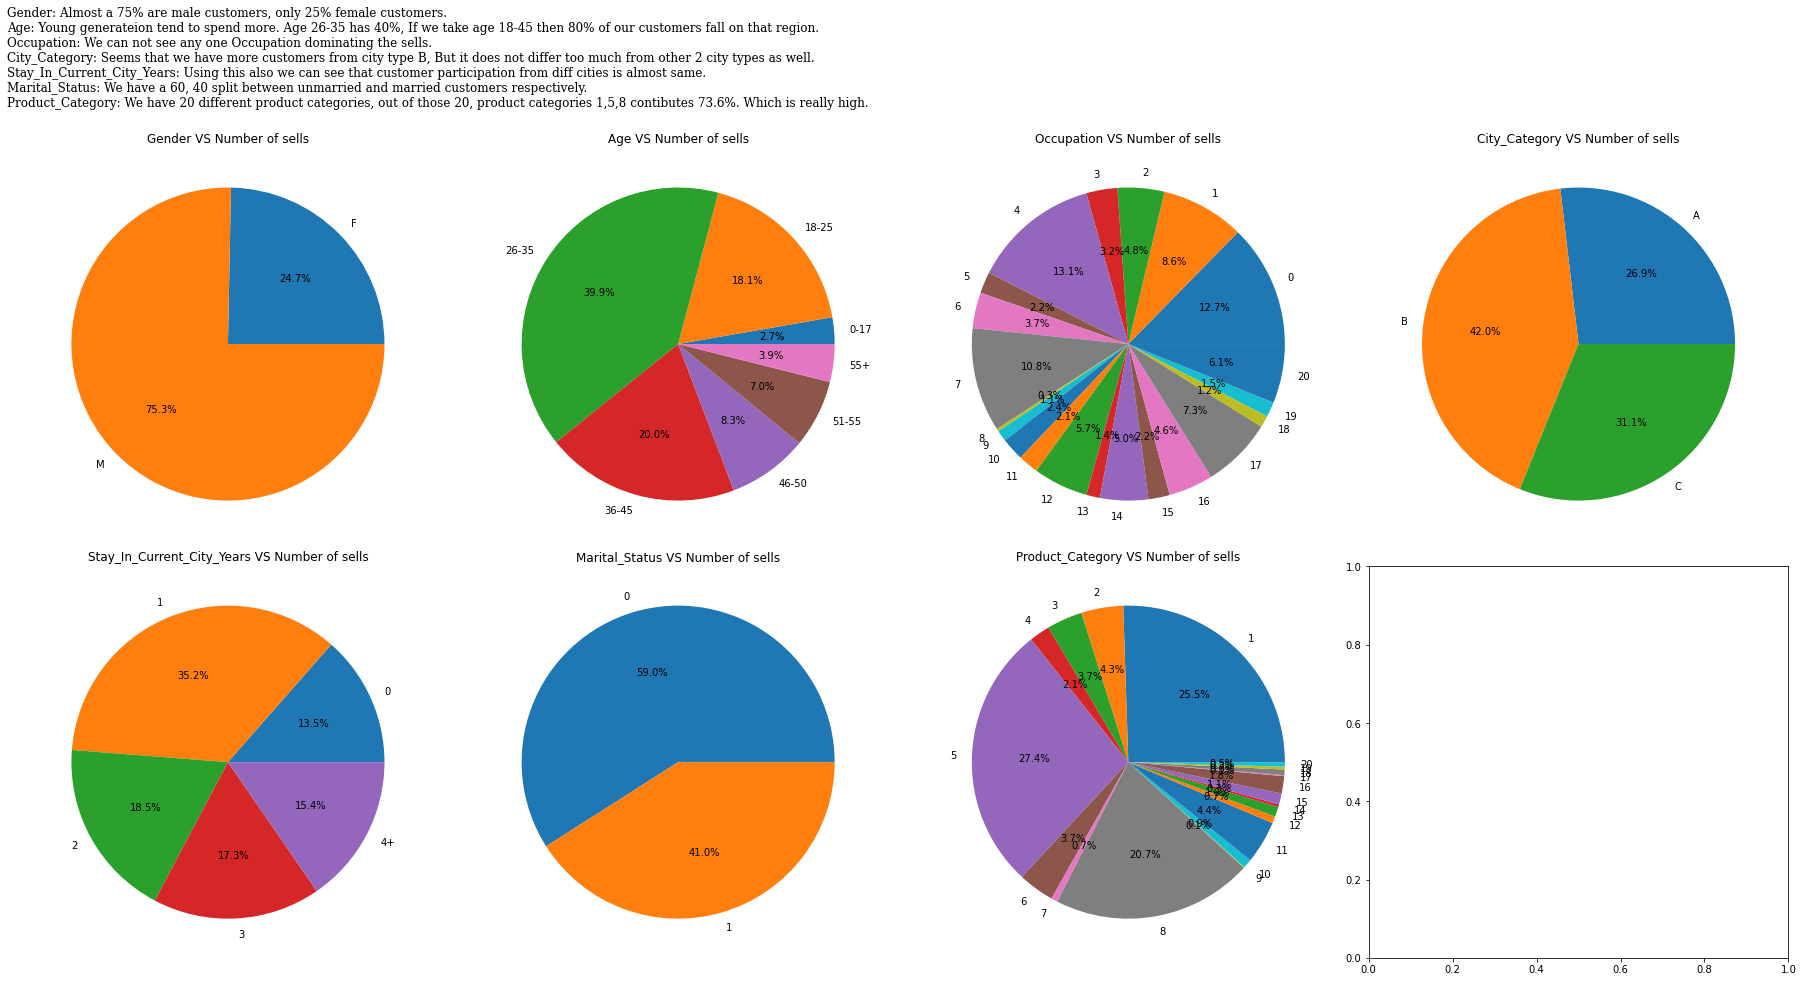

In [6]:
# Gender Age Occupation	City_Category	Stay_In_Current_City_Years	Marital_Status	Product_Category

fig, ax = plt.subplots(2,4, figsize=(25,12))

new_df = df[['Gender']].reset_index().groupby('Gender')['index'].count().reset_index()
ax[0][0].pie(new_df['index'], labels=new_df['Gender'], autopct='%.1f%%')


new_df = df[['Age']].reset_index().groupby('Age')['index'].count().reset_index()
ax[0][1].pie(new_df['index'], labels=new_df['Age'], autopct='%.1f%%')


new_df = df[['Occupation']].reset_index().groupby('Occupation')['index'].count().reset_index()
ax[0][2].pie(new_df['index'], labels=new_df['Occupation'], autopct='%.1f%%')


new_df = df[['City_Category']].reset_index().groupby('City_Category')['index'].count().reset_index()
ax[0][3].pie(new_df['index'], labels=new_df['City_Category'], autopct='%.1f%%')


new_df = df[['Stay_In_Current_City_Years']].reset_index().groupby('Stay_In_Current_City_Years')['index'].count().reset_index()
ax[1][0].pie(new_df['index'], labels=new_df['Stay_In_Current_City_Years'], autopct='%.1f%%')


new_df = df[['Marital_Status']].reset_index().groupby('Marital_Status')['index'].count().reset_index()
ax[1][1].pie(new_df['index'], labels=new_df['Marital_Status'], autopct='%.1f%%')


new_df = df[['Product_Category']].reset_index().groupby('Product_Category')['index'].count().reset_index()
ax[1][2].pie(new_df['index'], labels=new_df['Product_Category'], autopct='%.1f%%')



ax[0][0].set_title('Gender VS Number of sells')
ax[0][1].set_title('Age VS Number of sells')
ax[0][2].set_title('Occupation VS Number of sells')
ax[0][3].set_title('City_Category VS Number of sells')

ax[1][0].set_title('Stay_In_Current_City_Years VS Number of sells')
ax[1][1].set_title('Marital_Status VS Number of sells')
ax[1][2].set_title('Product_Category VS Number of sells')



observation = '''Gender: Almost a 75% are male customers, only 25% female customers.
Age: Young generateion tend to spend more. Age 26-35 has 40%, If we take age 18-45 then 80% of our customers fall on that region.
Occupation: We can not see any one Occupation dominating the sells.
City_Category: Seems that we have more customers from city type B, But it does not differ too much from other 2 city types as well.
Stay_In_Current_City_Years: Using this also we can see that customer participation from diff cities is almost same.
Marital_Status: We have a 60, 40 split between unmarried and married customers respectively. 
Product_Category: We have 20 different product categories, out of those 20, product categories 1,5,8 contibutes 73.6%. Which is really high.
'''

fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.tight_layout()
plt.show()

## Checking Purchase distribution & Outlier analysis

count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

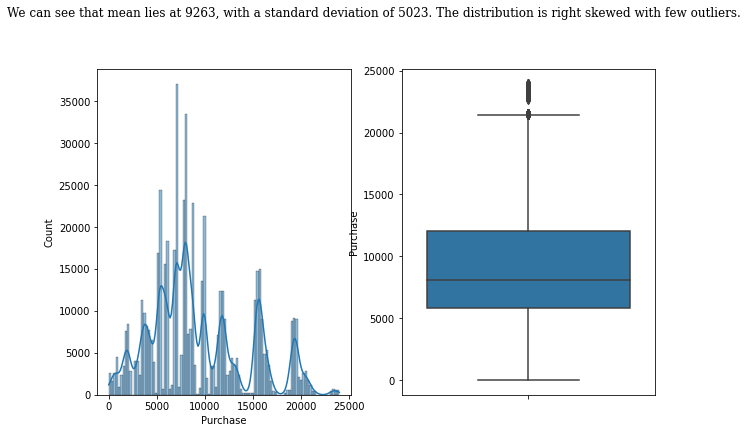

In [7]:
display(df['Purchase'].describe())

fig, ax = plt.subplots(1,2, figsize=(10,6))
sns.histplot(x=df['Purchase'], bins=100, kde=True, ax=ax[0])

sns.boxplot(y=df['Purchase'], ax=ax[1])

observation = '''We can see that mean lies at 9263, with a standard deviation of 5023. The distribution is right skewed with few outliers.'''
fig.text(0, 1, observation, fontsize=12, fontweight='light', fontfamily='serif')
plt.show()

 **Outlier analysis**

---


We see that we have so many outliers towards right tail of the distribution, Not removing them because the outliers are high in number(43k), almost 10% of the whole data. Also on analysis they did not seems out of the world high.

It is possible for someone to buy 23k worth of goods, which is the higest value for Purchase column.

In [10]:
q75, q25 = np.percentile(df['Purchase'], [75 ,25])
mean_purchase = np.mean(df['Purchase'])

df[ df['Purchase'] > (mean_purchase+(1.5*(q75-q25))) ]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
19,1000008,P00249542,M,26-35,12,C,4+,1,1,19614
41,1000010,P00111142,F,36-45,1,B,4+,1,1,18963
48,1000011,P00110842,F,26-35,1,C,1,0,1,19327
56,1000015,P00334242,M,26-35,7,A,1,0,1,19653
...,...,...,...,...,...,...,...,...,...,...
545836,1006030,P00112542,M,26-35,17,C,1,1,1,19023
545841,1006031,P00127842,F,18-25,0,C,1,0,1,19579
545844,1006032,P00112542,M,46-50,7,A,3,0,1,19325
545856,1006036,P00279742,F,26-35,15,B,4+,1,16,20766


## Bivariate and Univariate Graphical Analysis

##### Univariate VS Purchase Analysis

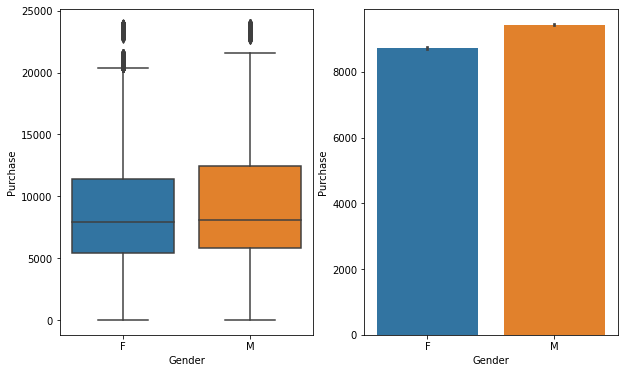

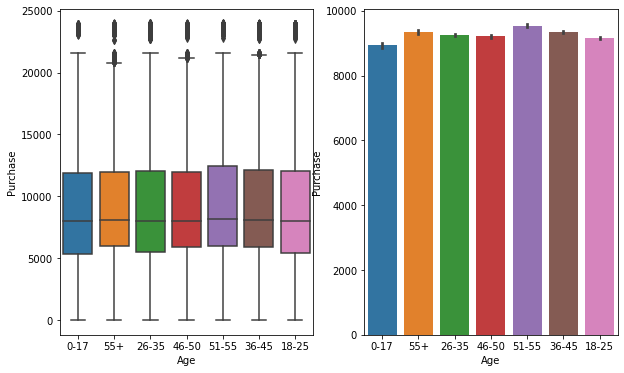

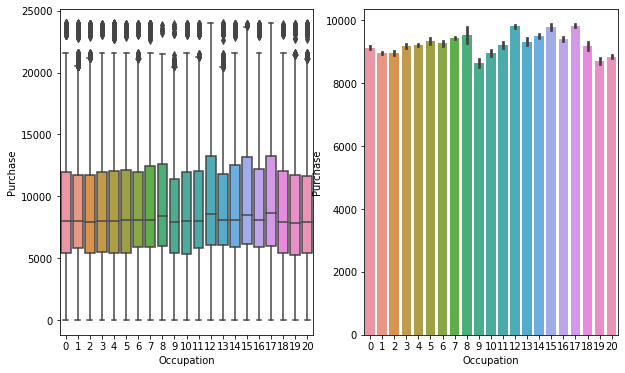

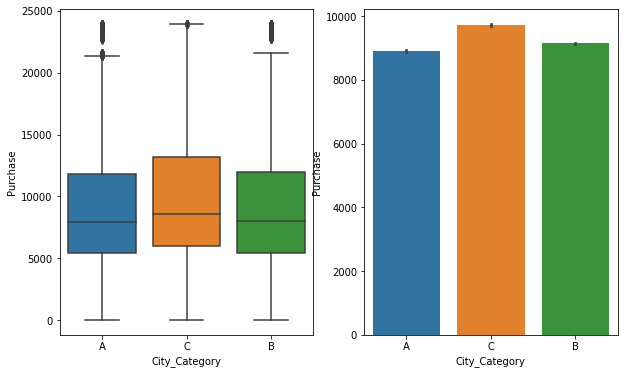

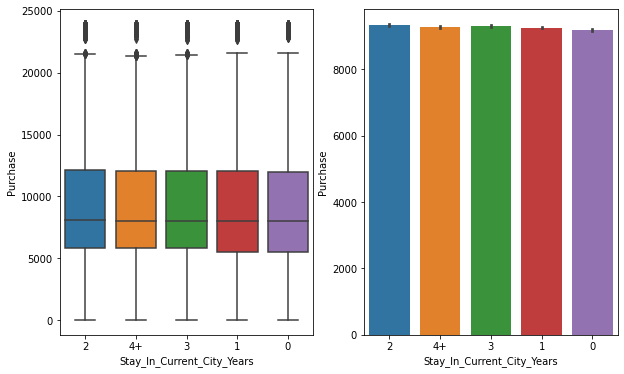

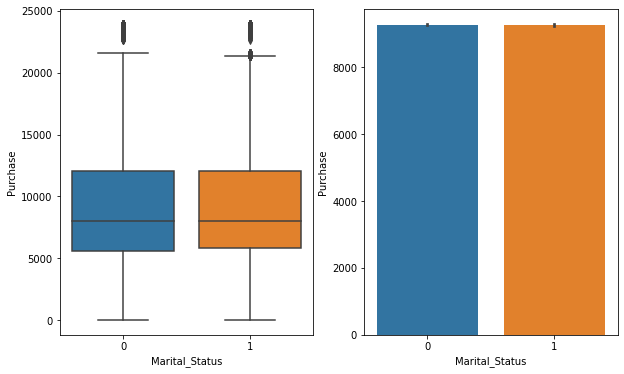

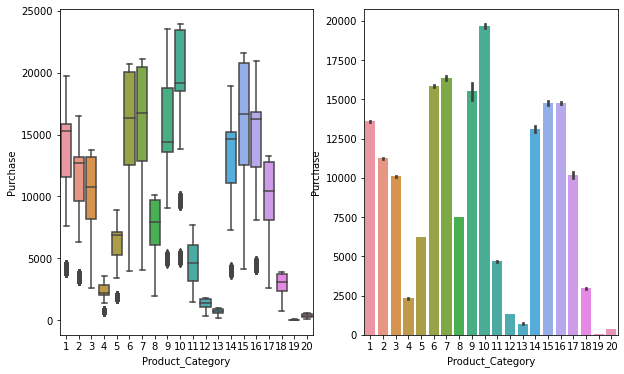

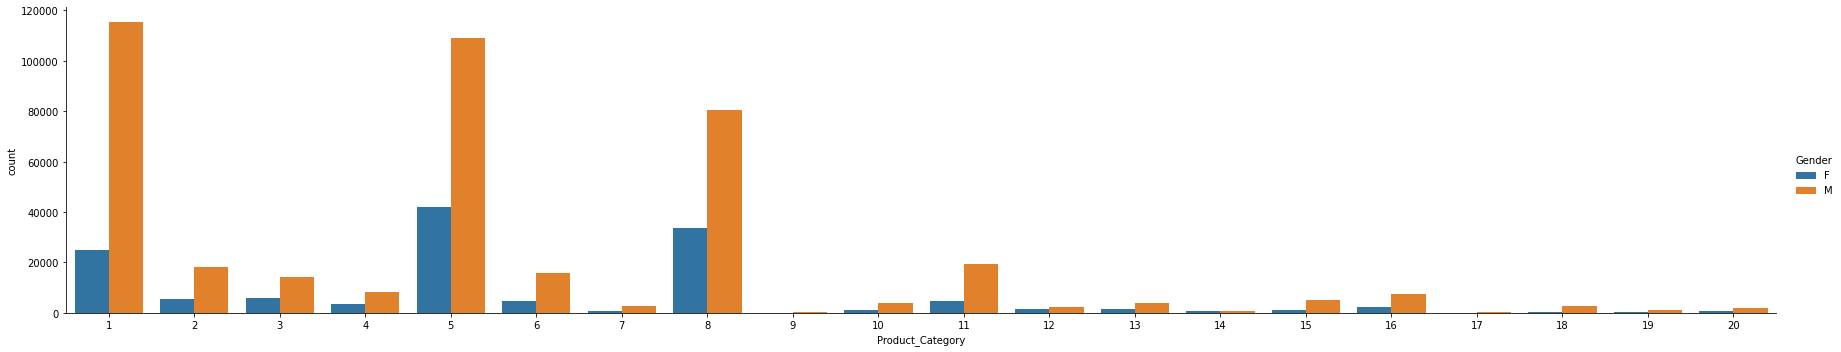

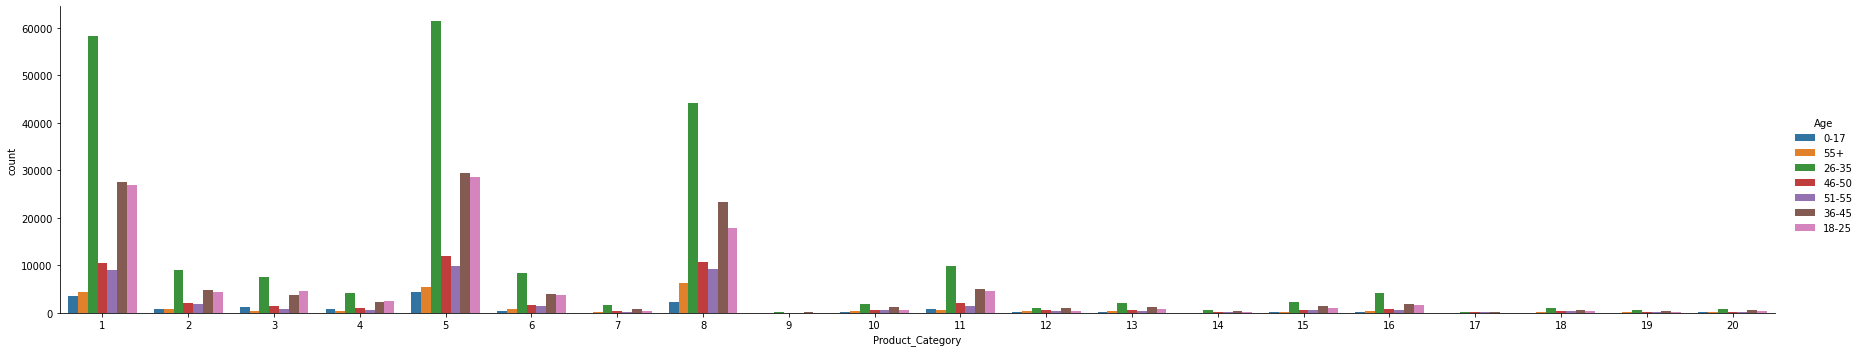

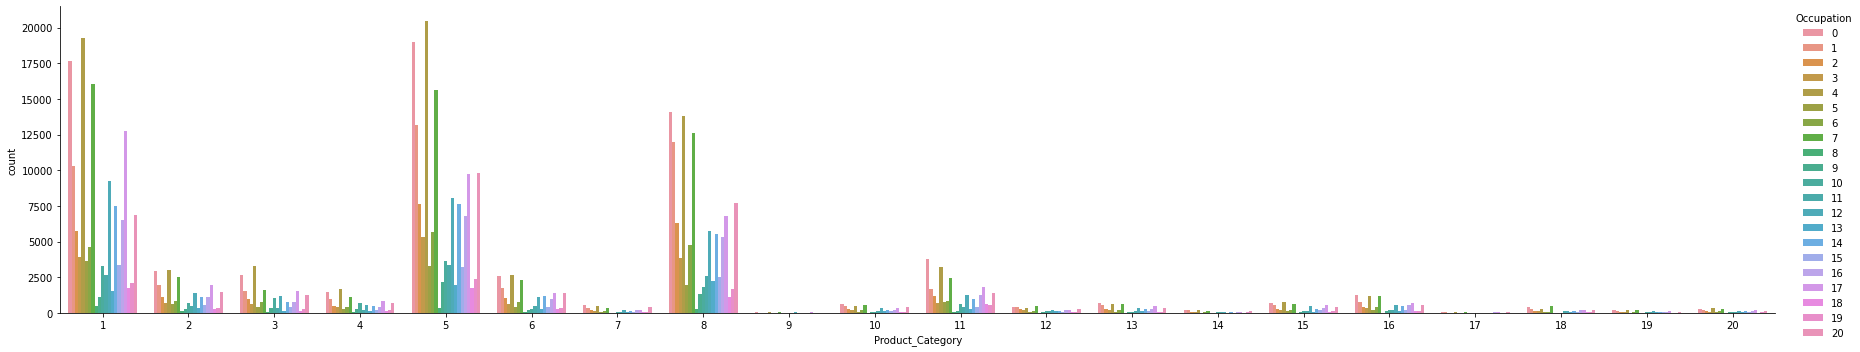

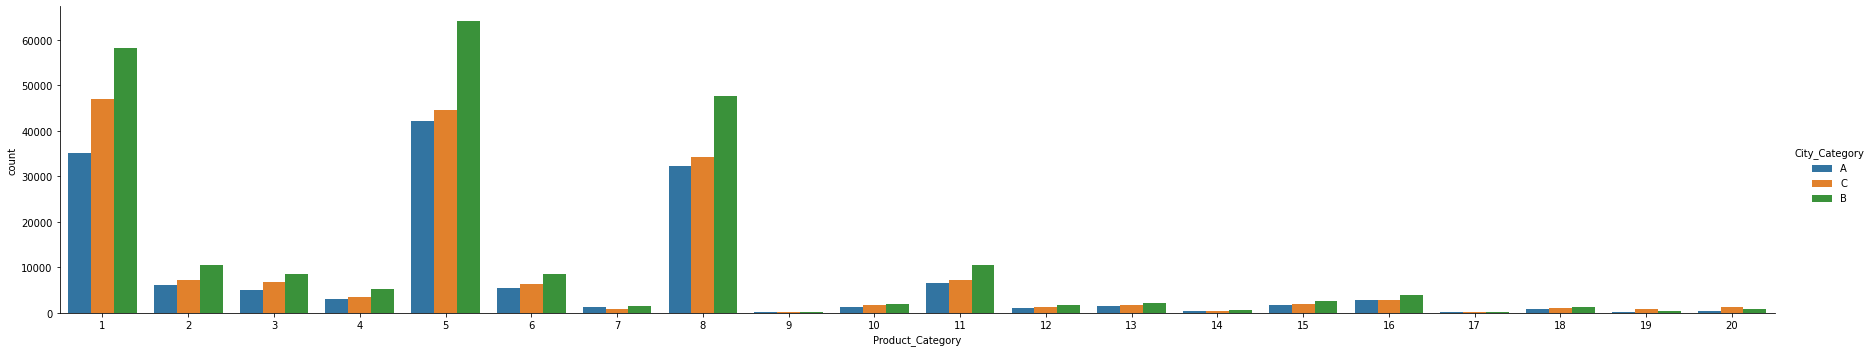

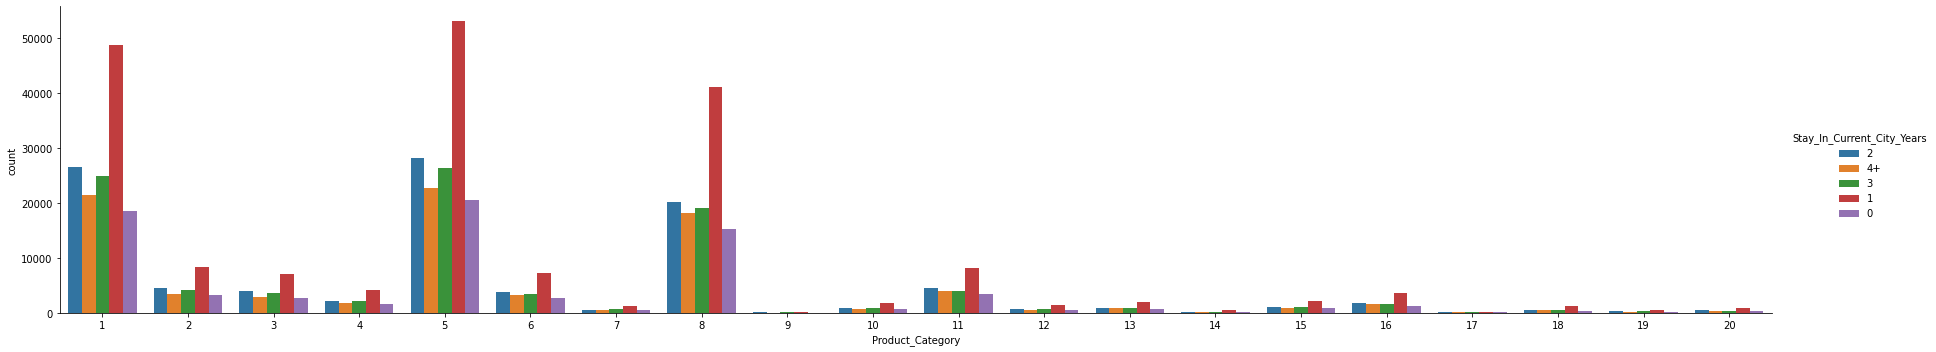

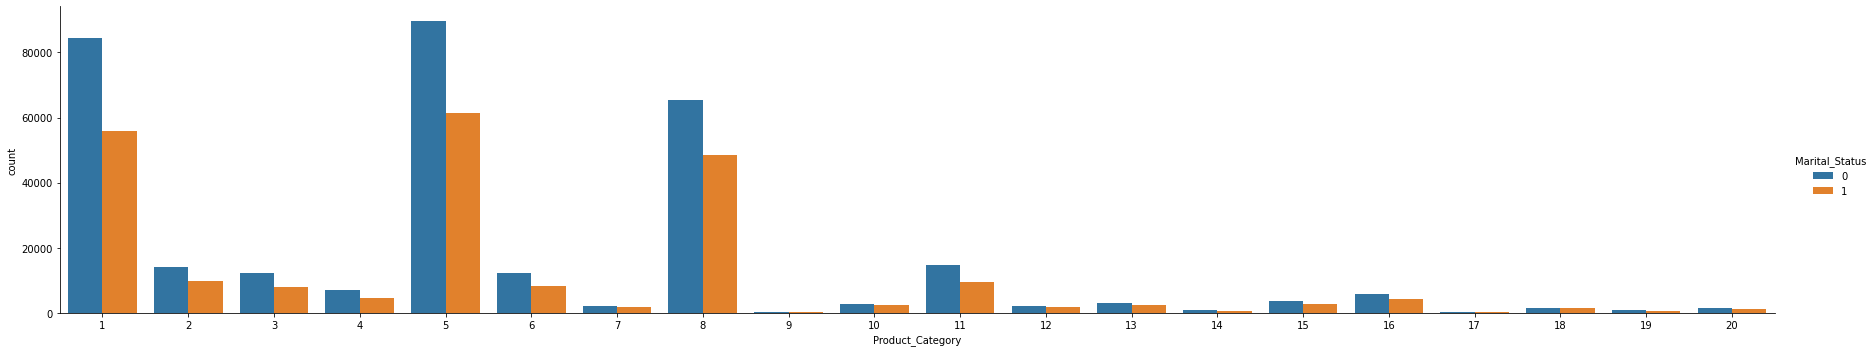

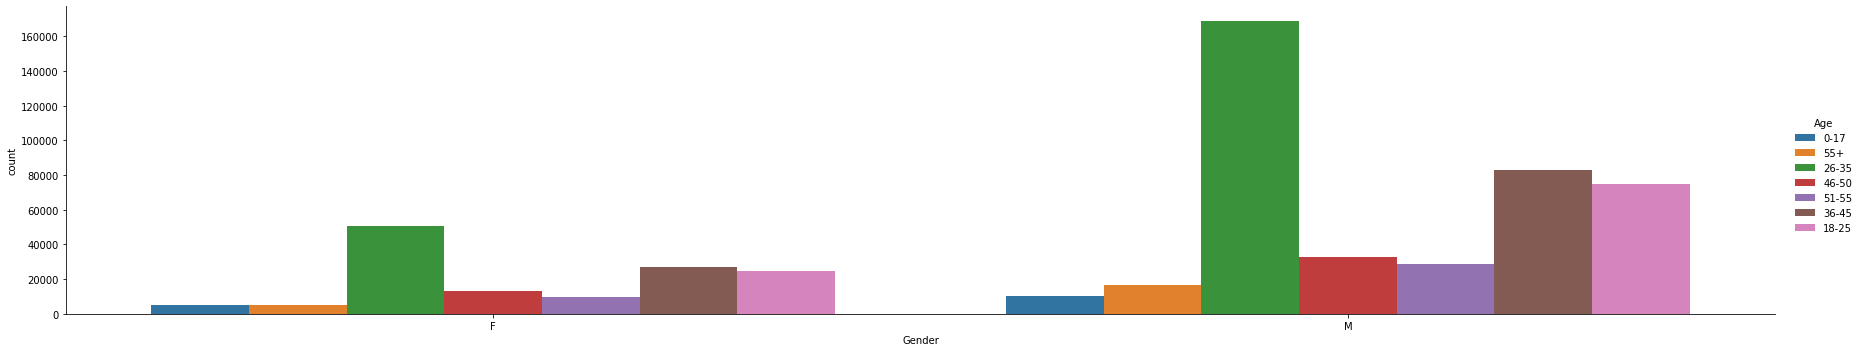

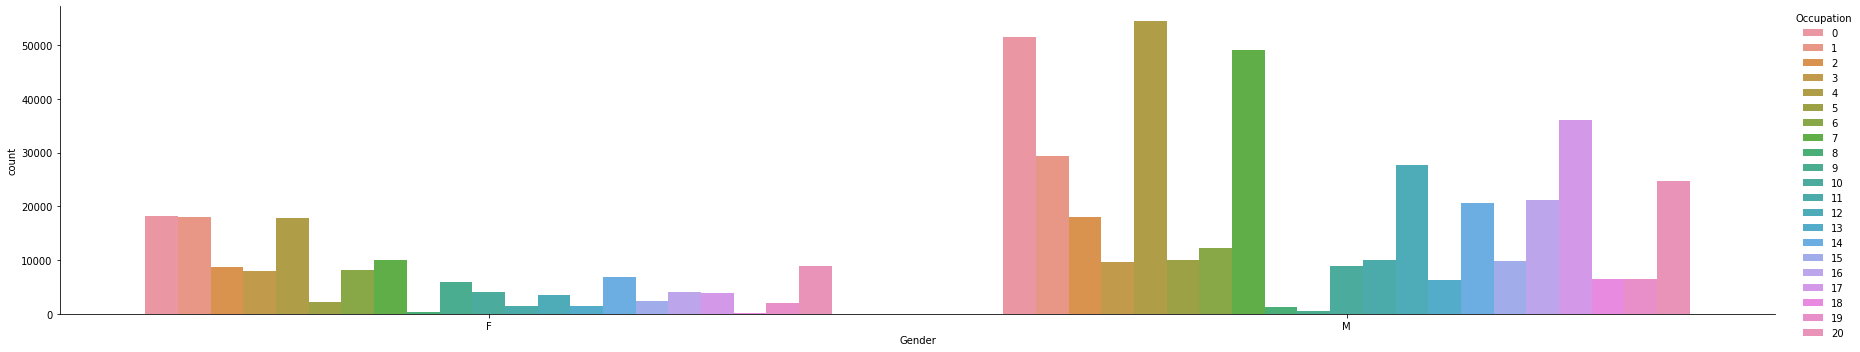

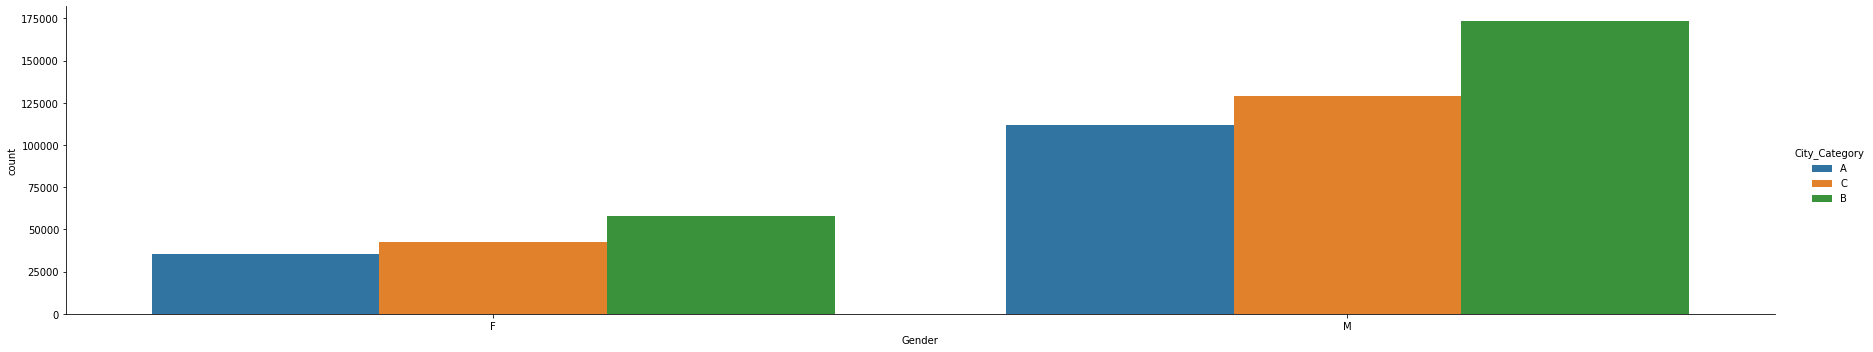

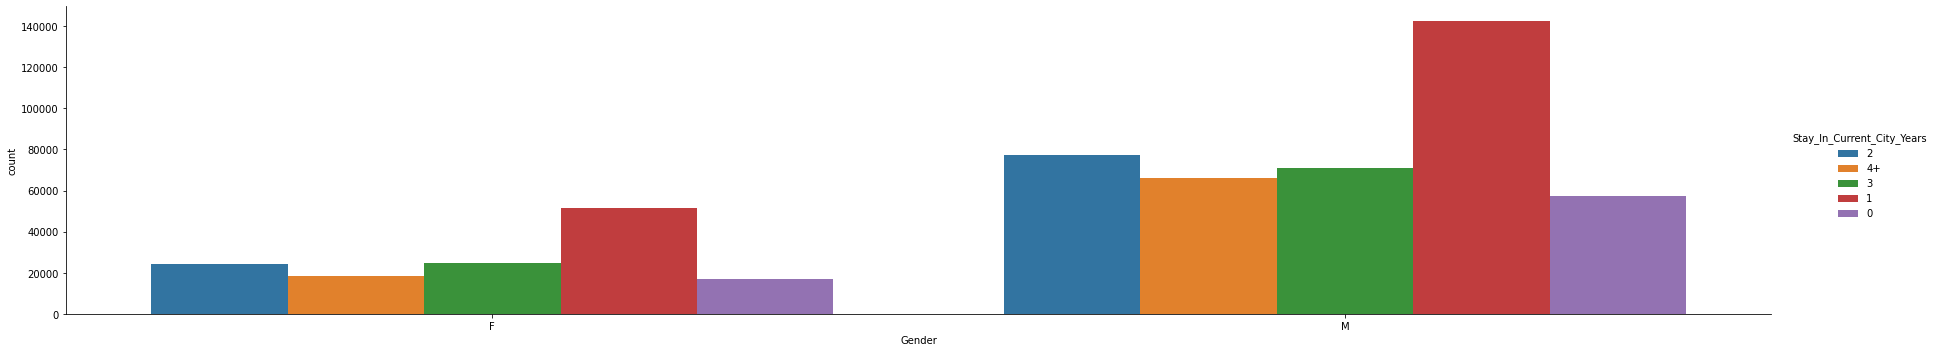

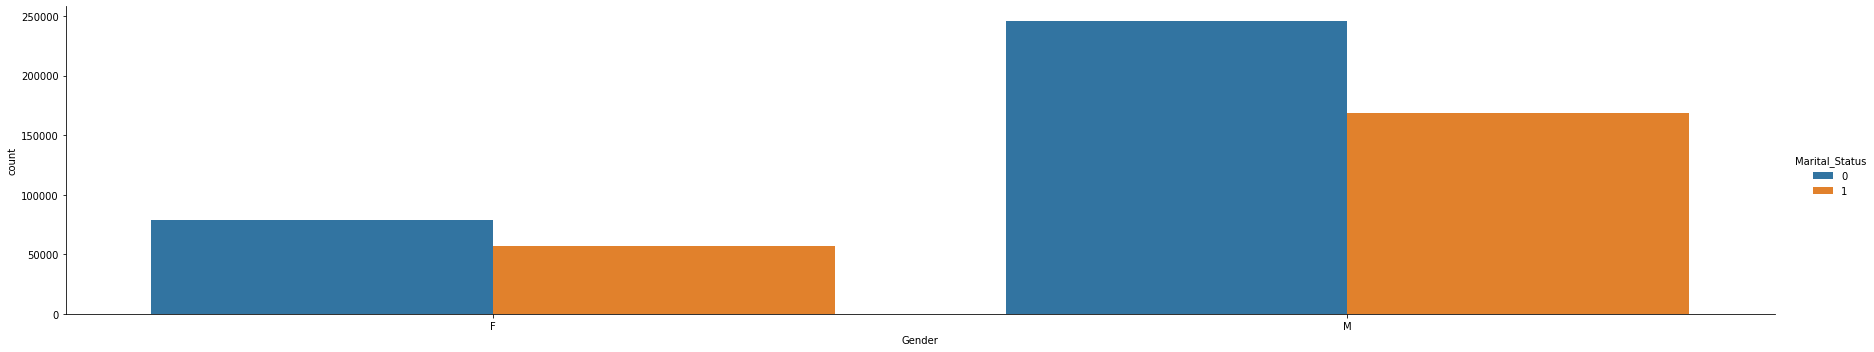

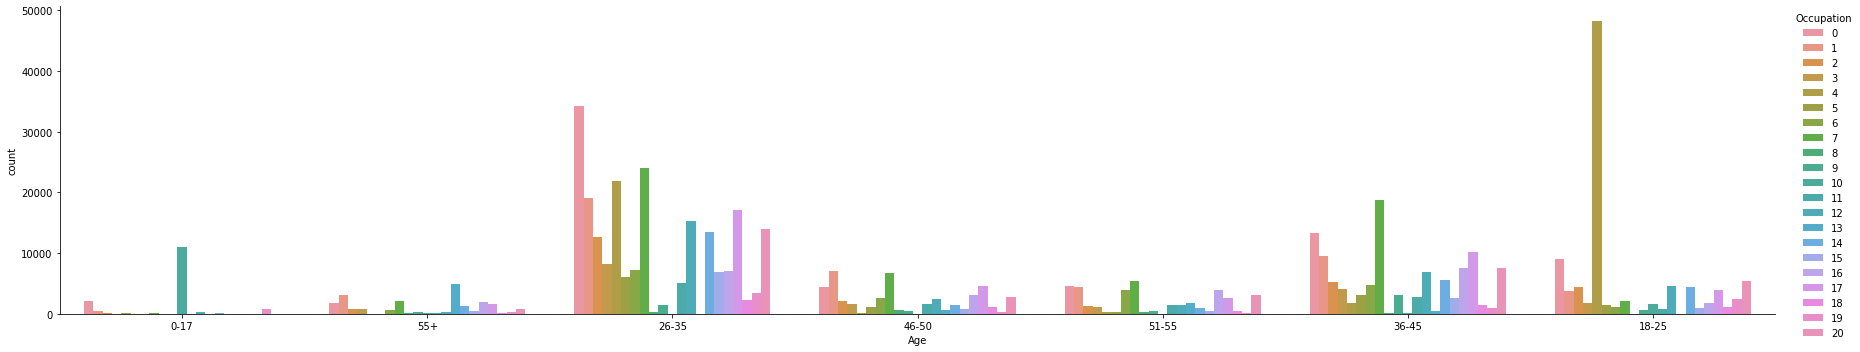

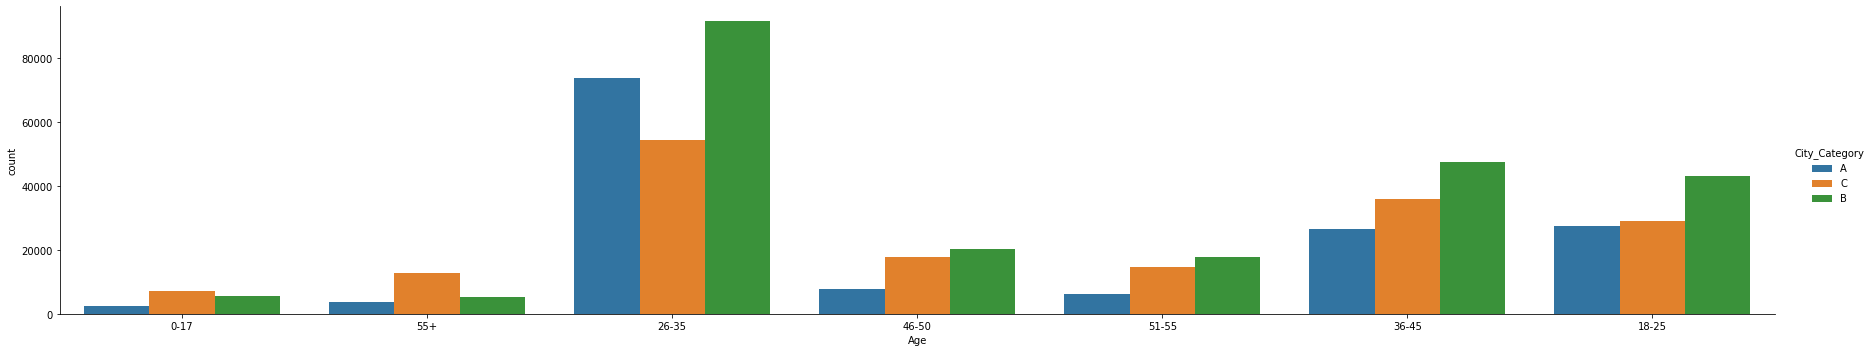

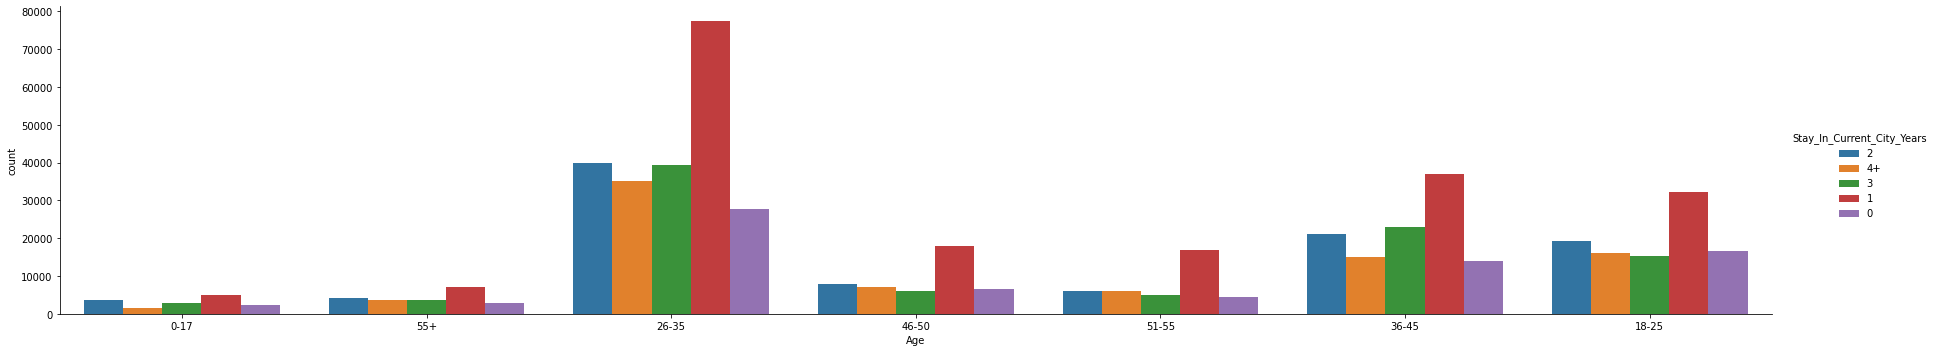

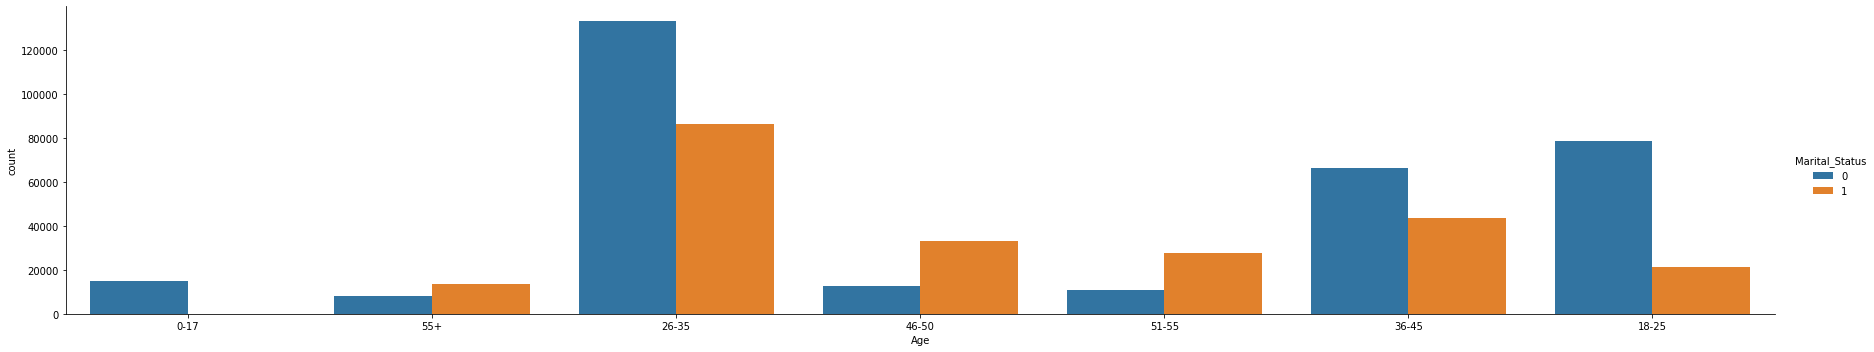

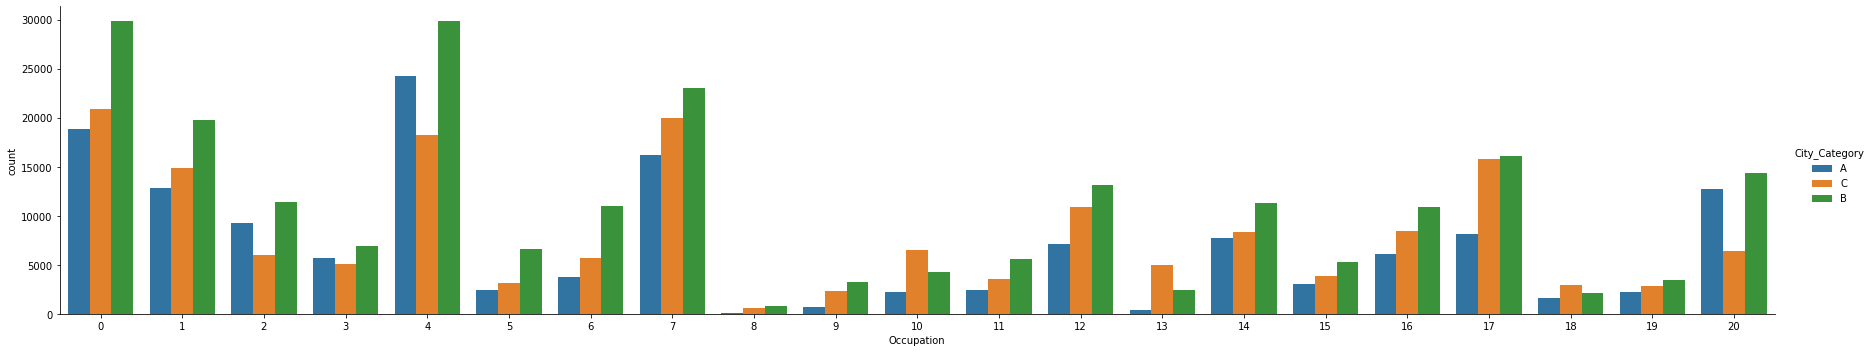

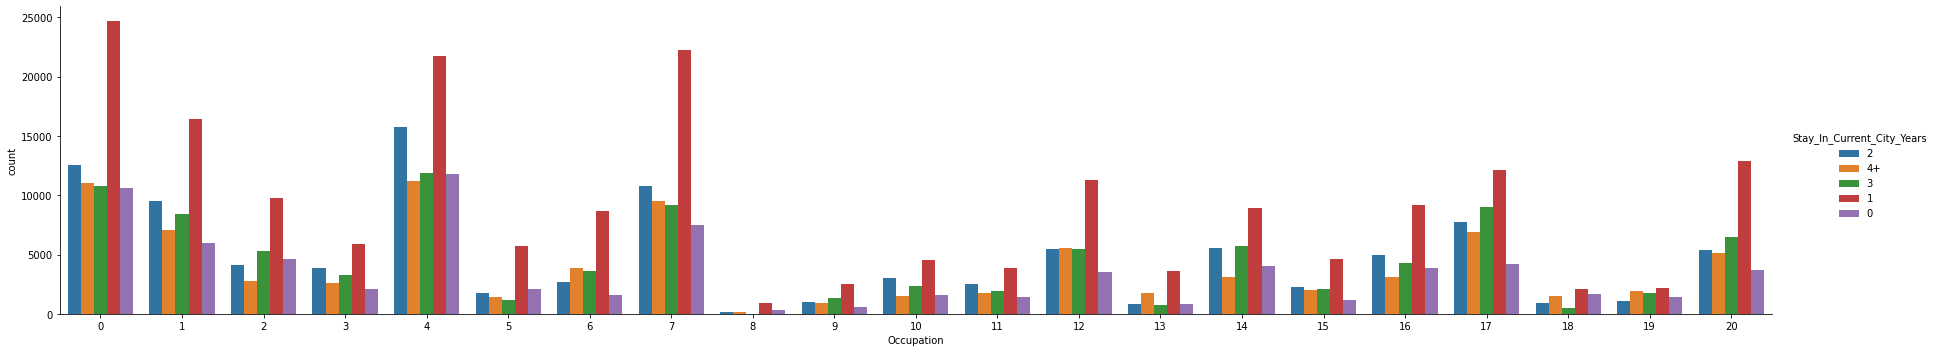

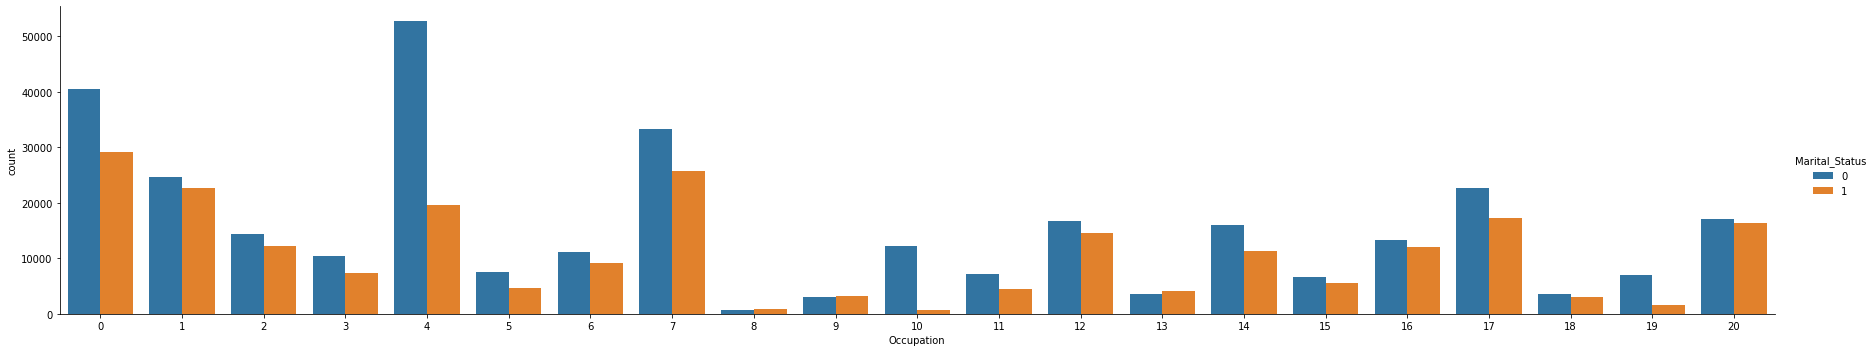

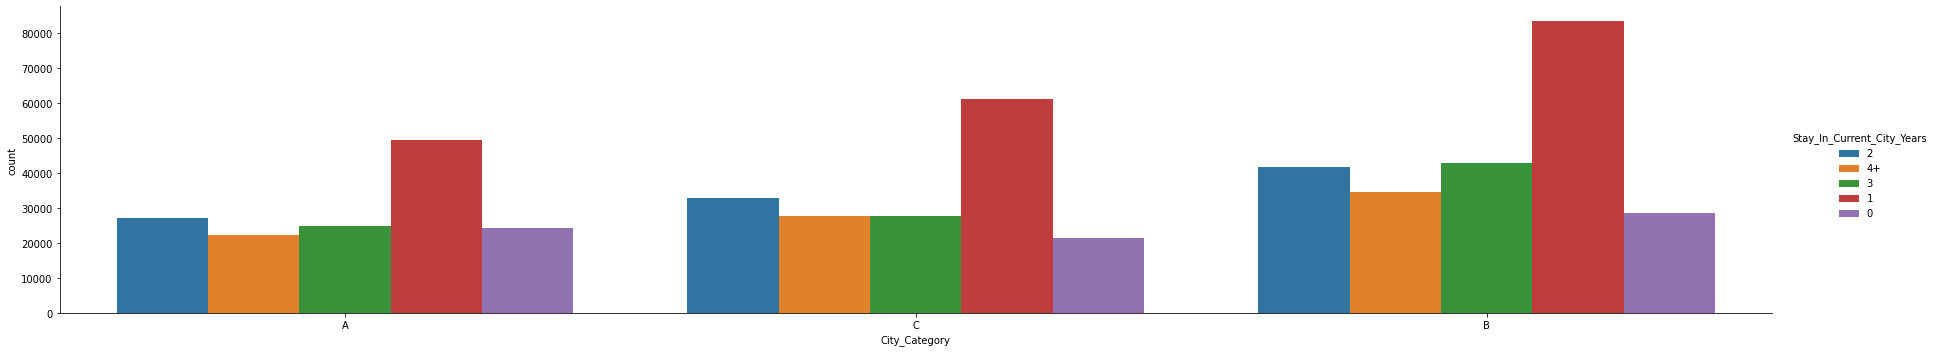

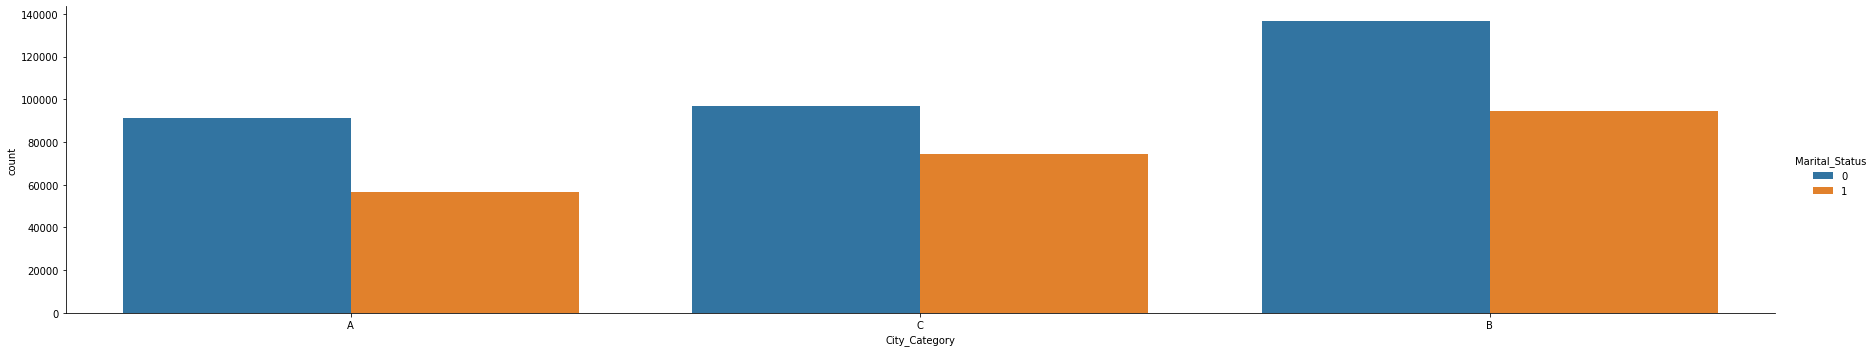

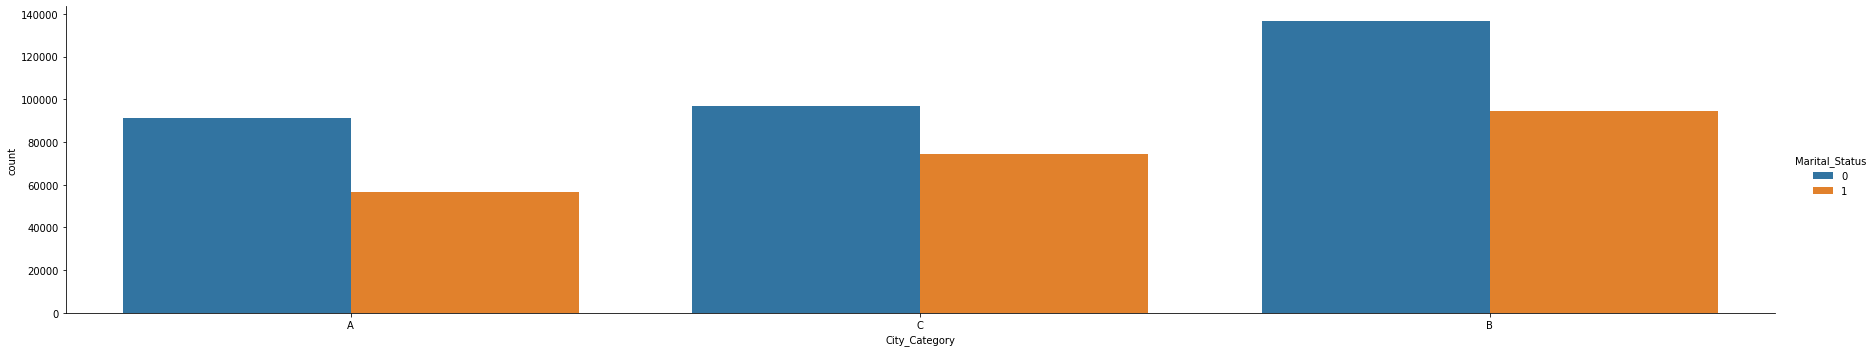

In [35]:
def func(args):

    x_col, y_col, x_col_type, y_col_type = args

    # print(x_col, y_col, x_col_type, y_col_type)

    if x_col_type=='num' and y_col_type=='num':
        # fig, ax = plt.subplots(2,3, figsize=(14,12))
        sns.scatterplot(data=df, x=x_col, y=y_col)
        plt.show()

        sns.lineplot(data=df, x=x_col, y=y_col)
        plt.show()

        sns.kdeplot(data=df, x=x_col, y=y_col)
        plt.show()

        sns.jointplot(data=df, x=x_col, y=y_col, kind='hex')
        plt.show()

        sns.jointplot(data=df, x=x_col, y=y_col, kind='scatter')
        plt.show()

        sns.jointplot(data=df, x=x_col, y=y_col, kind='kde')
        plt.show()

        sns.jointplot(data=df, x=x_col, y=y_col, kind='hist')
        plt.show()

    elif x_col_type=='cat' and y_col_type=='num':
        fig, ax = plt.subplots(1,2, figsize=(10,6))

        sns.boxplot(data=df, y=y_col, x=x_col, ax=ax[0])

        sns.barplot(data=df, y=y_col, x=x_col, ax=ax[1])
        plt.show()


    elif x_col_type=='cat' and y_col_type=='cat':
        sns.catplot(data=df, x=x_col, hue=y_col, kind='count', height=5, aspect=5)
        plt.show()


# Gender Age Occupation	City_Category	Stay_In_Current_City_Years	Marital_Status	Product_Category


lst = [
#        ('Occupation', 'Purchase', 'num', 'num'),
#        ('Product_Category', 'Purchase', 'num', 'num'), 
       
       # cat vs num
       ('Gender', 'Purchase', 'cat', 'num'), 
       ('Age', 'Purchase', 'cat', 'num'),
       ('Occupation', 'Purchase', 'cat', 'num'),
       ('City_Category', 'Purchase', 'cat', 'num'),
       ('Stay_In_Current_City_Years', 'Purchase', 'cat', 'num'),
       ('Marital_Status', 'Purchase', 'cat', 'num'),
       ('Product_Category', 'Purchase', 'cat', 'num'),
       
       # cat vs cat
       ('Product_Category', 'Gender', 'cat', 'cat'),
       ('Product_Category', 'Age', 'cat', 'cat'),
       ('Product_Category', 'Occupation', 'cat', 'cat'),
       ('Product_Category', 'City_Category', 'cat', 'cat'),
       ('Product_Category', 'Stay_In_Current_City_Years', 'cat', 'cat'),
       ('Product_Category', 'Marital_Status', 'cat', 'cat'),
       
       ('Gender', 'Age', 'cat', 'cat'),
       ('Gender', 'Occupation', 'cat', 'cat'),
       ('Gender', 'City_Category', 'cat', 'cat'),
       ('Gender', 'Stay_In_Current_City_Years', 'cat', 'cat'),
       ('Gender', 'Marital_Status', 'cat', 'cat'),

       ('Age', 'Occupation', 'cat', 'cat'),
       ('Age', 'City_Category', 'cat', 'cat'),
       ('Age', 'Stay_In_Current_City_Years', 'cat', 'cat'),
       ('Age', 'Marital_Status', 'cat', 'cat'),

       ('Occupation', 'City_Category', 'cat', 'cat'),
       ('Occupation', 'Stay_In_Current_City_Years', 'cat', 'cat'),
       ('Occupation', 'Marital_Status', 'cat', 'cat'),

       ('City_Category', 'Stay_In_Current_City_Years', 'cat', 'cat'),
       ('City_Category', 'Marital_Status', 'cat', 'cat'),

       ('City_Category', 'Marital_Status', 'cat', 'cat'),
       ]

for i in lst:
    func(i)

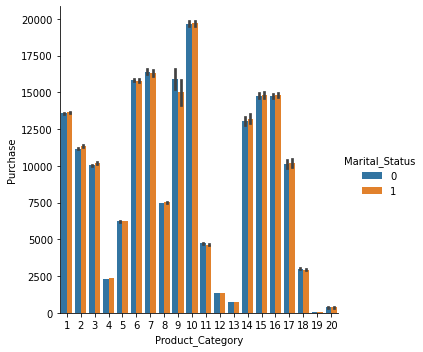

In [12]:
sns.catplot(data=df, x='Product_Category', y='Purchase', hue='Marital_Status', kind='bar')

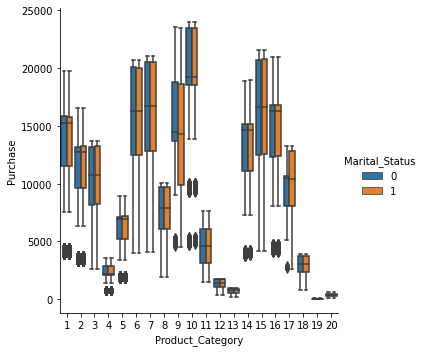

In [18]:
sns.catplot(data=df, x='Product_Category', y='Purchase', hue='Marital_Status', kind='box')

In [ ]:
---> 1D (Univariate Analysis): 
1> Categorical: Count, Pie, 
2> Continuous: Hist, Box, KDE, Violin, Line 

---> 2D (Bivariate Analysis):
1> Num - Num: Scatter, Line, Hexbin(Only be used instead of scatter plot but have more data), Joint, 
2> Num - Cat: Box, Violin, Bar, Pie  (with hue),  (Remember: Box, Violin will plot distribution, But Bar can only plot mean/count)
3> Cat - cat: Cat, Bar (with hue), stacked barchart

---> nD (Multi Dimensional):
1> 2D using hue.
2> Pairplot

##### Bivariate VS Purcahse Analysis

##### Correlation plot

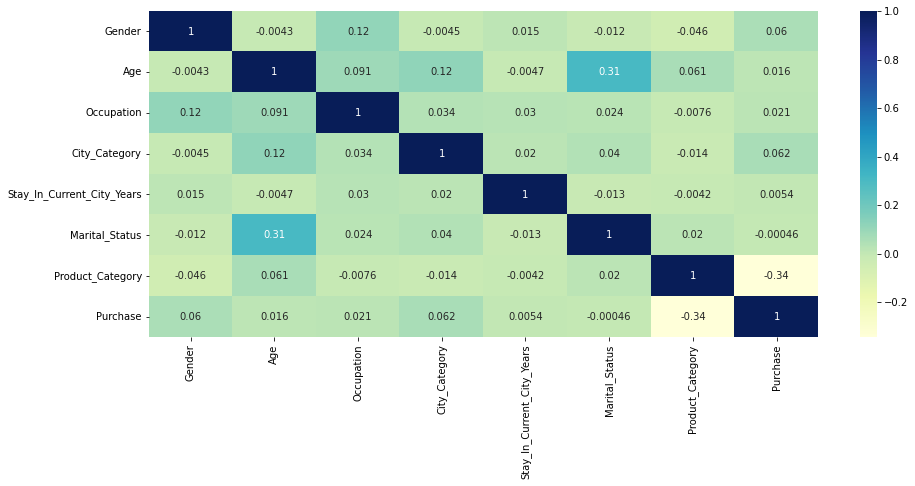

In [25]:
# we will create copy of the original df,
# then we will map categorical values into numbers before plotting correlation

new_df = df[['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category', 'Purchase']].copy()

gender_dct = {'F':0, 'M':1}
new_df['Gender'] = new_df['Gender'].replace(gender_dct)

age_dct = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
new_df['Age'] = new_df['Age'].replace(age_dct)

city_category_dct = {'A':0, 'B':1, 'C':2}
new_df['City_Category'] = new_df['City_Category'].replace(city_category_dct)

stay_in_current_city_years_dct = {'4+':4}
new_df['Stay_In_Current_City_Years'] = new_df['Stay_In_Current_City_Years'].replace(stay_in_current_city_years_dct)

new_df = new_df.astype(int)


plt.figure(figsize=(15,6))
sns.heatmap(new_df.corr(), cmap="YlGnBu", annot=True)
plt.show()

## Business Insights based on Non- Graphical and Visual Analysis